In [1]:
! cd .. ; pip install .

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Processing /root/OpenITS
  Preparing metadata (setup.py) ... done
  Created wheel for openits: filename=openits-0.1.0-py3-none-any.whl size=5597 sha256=2b5eb06cd39021bf6ed3eeb003b8eab9bb6bc6eb0bedb2f1d2c5df9824a8adaa
  Stored in directory: /tmp/pip-ephem-wheel-cache-aihkidls/wheels/37/ef/88/b28354cff826368a22ce989f794f8af6c3f66da2b51e3a5d45
Successfully built openits
  Attempting uninstall: openits
    Found existing installation: openits 0.1.0
    Uninstalling openits-0.1.0:
      Successfully uninstalled openits-0.1.0


In [2]:
import openmm as mm
import openmm.app as app
import openmm.unit as unit
import numpy as np
import matplotlib.pyplot as plt
from openits.its import ITSLangevinIntegratorGenerator
from tqdm import trange
from openits.energy_group import create_nonbonded_energy_group, create_rotamer_torsion_energy_group, create_rotamer_14_energy_group

# ITS example

Use log_nk [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


100%|██████████| 100/100 [00:04<00:00, 21.28it/s]


Use log_nk [-2.02996957 -1.78457954 -1.54731246 -1.31778297 -1.09562973 -0.88051365
 -0.67211613 -0.47013755 -0.27429589 -0.08432543  0.10002442  0.27899016
  0.45279523  0.62165086  0.78575692  0.94530269  1.10046751  1.25142151
  1.39832611  1.54133465  1.68059285]


100%|██████████| 100/100 [00:04<00:00, 21.47it/s]


Use log_nk [-3.38888513 -2.98001492 -2.58455086 -2.20185727 -1.83133822 -1.47243454
 -1.12462095 -0.7874036  -0.46031771 -0.14292546  0.16518591  0.46440588
  0.75510229  1.0376228   1.31229627  1.57943403  1.83933101  2.09226683
  2.33850679  2.57830277  2.81189406]


100%|██████████| 100/100 [00:04<00:00, 22.07it/s]


Use log_nk [-3.83901831 -3.37545461 -2.92717349 -2.49344511 -2.07358538 -1.66695246
 -1.27294353 -0.89099188 -0.52056425 -0.1611584   0.18769914  0.52645505
  0.85553115  1.17532604  1.48621674  1.78856008  2.08269408  2.36893915
  2.64759922  2.9189628   3.18330397]


100%|██████████| 100/100 [00:04<00:00, 22.05it/s]


Use log_nk [-3.91334265 -3.44049312 -2.9832916  -2.54098867 -2.11288189 -1.69831216
 -1.29666042 -0.90734467 -0.52981724 -0.16356231  0.19190639  0.53704765
  0.8722947   1.19805695  1.51472162  1.82265521  2.12220489  2.41369972
  2.69745183  2.97375753  3.24289824]


100%|██████████| 100/100 [00:04<00:00, 21.98it/s]


Use log_nk [-4.14013367 -3.63912577 -3.15483071 -2.68644572 -2.23321807 -1.79444131
 -1.36945177 -0.95762537 -0.55837478 -0.17114671  0.20458047  0.56929893
  0.92347347  1.26754333  1.60192396  1.92700854  2.2431695   2.55075982
  2.85011431  3.14155072  3.42537084]


100%|██████████| 100/100 [00:04<00:00, 21.86it/s]


Use log_nk [-4.58780857 -4.03324381 -3.4970344  -2.97830929 -2.47625172 -1.99009505
 -1.51911894 -1.06264589 -0.62003812 -0.19069464  0.22595132  0.63043479
  1.02326121  1.40490849  1.77582887  2.13645062  2.48717965  2.82840091
  3.1604798   3.48376335  3.79858142]


100%|██████████| 100/100 [00:04<00:00, 22.11it/s]


Use log_nk [-4.71123565 -4.14198035 -3.59153724 -3.0590121  -2.54356639 -2.04441303
 -1.56081243 -1.09206904 -0.63752802 -0.19657237  0.23137983  0.64687784
  1.05044056  1.44255861  1.82369621  2.19429296  2.55476544  2.90550875
  3.24689782  3.57928873  3.90301987]


100%|██████████| 100/100 [00:04<00:00, 22.19it/s]


Use log_nk [-4.64049708 -4.07968965 -3.53744432 -3.01287539 -2.50515246 -2.0134962
 -1.53717444 -1.07549869 -0.62782089 -0.1935305   0.2279482   0.63715855
  1.03461378  1.42079903  1.79617329  2.16117115  2.51620437  2.86166337
  3.19791862  3.52532188  3.84420739]


100%|██████████| 100/100 [00:04<00:00, 22.18it/s]


Use log_nk [-4.83434953 -4.25012981 -3.68522068 -3.1387066  -2.60972905 -2.09748216
 -1.60120872 -1.12019648 -0.65377489 -0.20131206  0.23778802  0.66408802
  1.07811956  1.48038538  1.87136125  2.25149781  2.6212222   2.9809396
  3.33103462  3.67187262  4.0038009 ]


100%|██████████| 100/100 [00:04<00:00, 22.01it/s]


Use log_nk [-4.64263301 -4.08098047 -3.53801474 -3.01284379 -2.50463114 -2.01259161
 -1.53598743 -1.07412471 -0.62635023 -0.19204849  0.22936098  0.63842607
  1.03566437  1.42156521  1.79659157  2.16118187  2.51575153  2.86069449
  3.19638456  3.52317672  3.84140826]


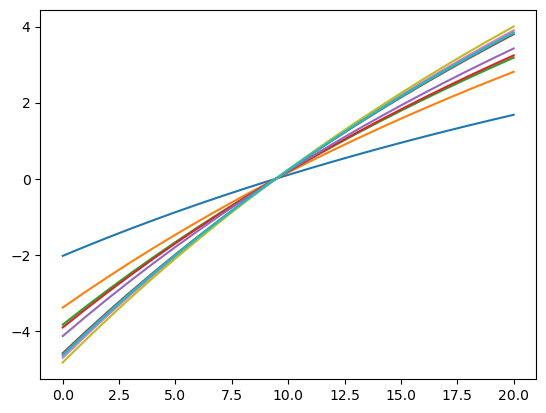

In [5]:
pdb = app.PDBFile("loop.pdb")
forcefield = app.ForceField("amber14-all.xml", "implicit/gbn2.xml")
system = forcefield.createSystem(pdb.topology, nonbondedMethod=app.NoCutoff, constraints=app.HBonds)
# system.addForce(mm.MonteCarloBarostat(1*unit.atmosphere, 300*unit.kelvin, 25))


# Define the temperature list
temp_list = np.arange(300, 401, 5)
int_gen = ITSLangevinIntegratorGenerator(temp_list, 2.0, 0.002)
log_nk_list = []

start_state = None
for nloop in range(10):
    simulation = app.Simulation(pdb.topology, system, int_gen.integrator)
    if start_state is None:
        simulation.context.setPositions(pdb.positions)
        simulation.context.setVelocitiesToTemperature(300*unit.kelvin)
    else:
        simulation.context.setPeriodicBoxVectors(*start_state.getPeriodicBoxVectors())
        simulation.context.setPositions(start_state.getPositions())
        simulation.context.setVelocities(start_state.getVelocities())
    simulation.minimizeEnergy()
    energy_list = []
    for nstep in trange(100):
        simulation.step(250)
        state = simulation.context.getState(getEnergy=True)
        energy_list.append(state.getPotentialEnergy().value_in_unit(unit.kilojoule_per_mole))
    energy_list = np.array(energy_list)
    int_gen.update_nk(energy_list, ratio=0.5)
    log_nk_list.append(int_gen.log_nk)
    start_state = simulation.context.getState(getPositions=True, getVelocities=True)

    plt.plot(log_nk_list[-1])

# SITS example

Use log_nk [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


100%|██████████| 100/100 [00:05<00:00, 19.22it/s]


Use log_nk [-5.69845333 -5.0124225  -4.34868143 -3.70616603 -3.08387876 -2.48088353
 -1.89630102 -1.32930446 -0.77911574 -0.24500191  0.27372805  0.77772623
  1.26760842  1.74395665  2.20732147  2.65822401  3.09715796  3.52459134
  3.94096812  4.34670977  4.74221669]


100%|██████████| 100/100 [00:05<00:00, 19.87it/s]


Use log_nk [-8.92890815 -7.85297168 -6.81216139 -5.80479849 -4.8293091  -3.88421619
 -2.96813225 -2.07975265 -1.21784949 -0.38126612  0.43108801  1.22024196
  1.98716756  2.73278338  3.45795825  4.16351464  4.85023166  5.5188479
  6.17006401  6.80454512  7.42292303]


100%|██████████| 100/100 [00:05<00:00, 19.83it/s]


Use log_nk [-10.8687215   -9.55924281  -8.29242068  -7.06623039  -5.87877375
  -4.72826932  -3.61304355  -2.53152271  -1.48222551  -0.46375639
   0.52520063   1.48588759   2.41947774   3.32708025   4.2097446
   5.06846455   5.90418183   6.71778953   7.51013525   8.28202396
   9.03422068]


100%|██████████| 100/100 [00:05<00:00, 19.67it/s]


Use log_nk [-11.414646   -10.03960592  -8.70935102  -7.42174928  -6.17480201
  -4.96663351  -3.79548178  -2.65968997  -1.5576987   -0.48803888
   0.55067464   1.55974911   2.54041921   3.49385207   4.42115188
   5.32336402   6.20147901   7.05643603   7.88912627   8.70039589
   9.49104894]


100%|██████████| 100/100 [00:05<00:00, 19.49it/s]


Use log_nk [-11.87264831 -10.44254454  -9.05900381  -7.71980934  -6.42288285
  -5.16627388  -3.94815013  -2.76678861  -1.62056757  -0.50795919
   0.57247714   1.622101     2.64219653   3.63397765   4.59859276
   5.53712917   6.45061704   7.34003318   8.20630443   9.05031082
   9.87288851]


100%|██████████| 100/100 [00:05<00:00, 19.68it/s]


Use log_nk [-12.02047585 -10.57273369  -9.17212156  -7.81639077  -6.5034333
  -5.23127095  -3.99804554  -2.8020099   -1.64151971  -0.51502605
   0.57893148   1.64173092   2.67467375   3.67899008   4.65584354
   5.60633566   6.53151001   7.43235592   8.30981202   9.16476938
   9.99807455]


100%|██████████| 100/100 [00:05<00:00, 19.97it/s]


Use log_nk [-12.21247633 -10.74034513  -9.31634175  -7.93817089  -6.6036803
  -5.31084979  -4.05778127  -2.84268964  -1.66389448  -0.51981253
   0.59104927   1.67010009   2.71867105   3.73802049   4.72933894
   5.69375356   6.63233234   7.5460879    8.43598104   9.30292399
  10.14778345]


100%|██████████| 100/100 [00:05<00:00, 19.84it/s]


Use log_nk [-12.25623623 -10.77861244  -9.34935639  -7.96615449  -6.6268377
  -5.32937039  -4.07184029  -2.85244929  -1.66950504  -0.52141333
   0.59332893   1.6761401    2.72835971   3.75125384   4.74602004
   5.71379195   6.65564348   7.57259266   8.46560523   9.33559796
  10.18344169]


100%|██████████| 100/100 [00:04<00:00, 20.07it/s]


Use log_nk [-12.27247361 -10.79298471  -9.36192123  -7.97696375  -6.6359379
  -5.33680324  -4.07764317  -2.8566556   -1.67214467  -0.52251296
   0.59374551   1.67805166   2.73174733   3.75610063   4.75231097
   5.72151361   6.66478386   7.58314102   8.47755195   9.34893436
  10.19815994]


100%|██████████| 100/100 [00:05<00:00, 19.79it/s]

Use log_nk [-12.16875709 -10.70197843  -9.28317576  -7.91005127  -6.58045087
  -5.29235314  -4.04385933  -2.83318419  -1.65864765  -0.51866721
   0.58824905   1.66350879   2.7084413    3.72430284   4.71228159
   5.67350217   6.60902982   7.51987427   8.4069933    9.27129599
  10.11364582]


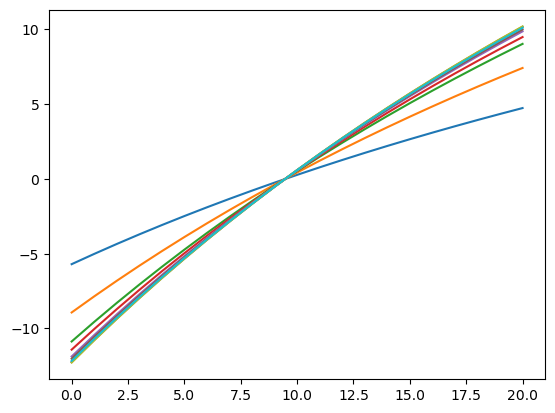

In [6]:
pdb = app.PDBFile("loop.pdb")
forcefield = app.ForceField("amber14-all.xml", "implicit/gbn2.xml")
system = forcefield.createSystem(pdb.topology, nonbondedMethod=app.NoCutoff, constraints=app.HBonds)
# system.addForce(mm.MonteCarloBarostat(1*unit.atmosphere, 300*unit.kelvin, 25))
for force in system.getForces():
    if isinstance(force, mm.CustomGBForce) or isinstance(force, mm.NonbondedForce):
        force.setForceGroup(1)
    else:
        force.setForceGroup(0)

# Define the temperature list
temp_list = np.arange(300, 401, 5)
int_gen = ITSLangevinIntegratorGenerator(temp_list, 2.0, 0.002, boost_e1_only=True)
log_nk_list = []

start_state = None
for nloop in range(10):
    simulation = app.Simulation(pdb.topology, system, int_gen.integrator)
    if start_state is None:
        simulation.context.setPositions(pdb.positions)
        simulation.context.setVelocitiesToTemperature(300*unit.kelvin)
    else:
        simulation.context.setPeriodicBoxVectors(*start_state.getPeriodicBoxVectors())
        simulation.context.setPositions(start_state.getPositions())
        simulation.context.setVelocities(start_state.getVelocities())
    simulation.minimizeEnergy()
    energy_list = []
    for nstep in trange(100):
        simulation.step(250)
        state = simulation.context.getState(getEnergy=True, groups={1})
        energy_list.append(state.getPotentialEnergy().value_in_unit(unit.kilojoule_per_mole))
    energy_list = np.array(energy_list)
    int_gen.update_nk(energy_list, ratio=0.5)
    log_nk_list.append(int_gen.log_nk)
    start_state = simulation.context.getState(getPositions=True, getVelocities=True)

    plt.plot(log_nk_list[-1])

# Boost protein-water interaction in SITS

Use log_nk [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


100%|██████████| 100/100 [00:11<00:00,  9.09it/s]


Use log_nk [-5.66166431 -4.98092406 -4.32215054 -3.68429825 -3.06638705 -2.46749716
 -1.88676452 -1.32337671 -0.77656908 -0.24562135  0.27014561  0.77137264
  1.25866497  1.73259467  2.19370285  2.64250176  3.07947671  3.50508774
  3.91977133  4.32394184  4.7179929 ]


100%|██████████| 100/100 [00:10<00:00,  9.34it/s]


Use log_nk [-10.44897535  -9.19245614  -7.97651098  -6.79920876  -5.65873906
  -4.55340284  -3.48160402  -2.44184178  -1.43270357  -0.45285872
   0.49894743   1.42389887   2.32311382   3.19764923   4.04850495
   4.87662751   5.68291363   6.46821345   7.23333354   7.97903963
   8.70605916]


100%|██████████| 100/100 [00:10<00:00,  9.19it/s]


Use log_nk [-13.14755821 -11.56579285 -10.03523317  -8.55343923  -7.11812362
  -5.72713966  -4.37847081  -3.07022093  -1.80060542  -0.56794318
   0.62935086   1.7927724    2.92373406   4.02357103   5.09354631
   6.13485551   7.14863129   8.13594749   9.09782281  10.03522438
  10.94907095]


100%|██████████| 100/100 [00:10<00:00,  9.21it/s]


Use log_nk [-15.90723212 -13.99347551 -12.14166566 -10.34885178  -8.61226743
  -6.92931631  -5.29755937  -3.71470314  -2.17858897  -0.68718328
   0.76143133   2.1690643    3.53742459   4.86812753   6.16270119
   7.42259215   8.64917088   9.84373667  11.0075222   12.14169772
  13.247375  ]


100%|██████████| 100/100 [00:10<00:00,  9.21it/s]


Use log_nk [-16.79096076 -14.77094582 -12.81630228 -10.92391737  -9.09087275
  -7.31442961  -5.59201506  -3.92120971  -2.29973646  -0.72545013
   0.80367195   2.28953853   3.7339524    5.13861759   6.50514611
   7.835064     9.12981705  10.39077597  11.61924123  12.81644748
  13.98356765]


100%|██████████| 100/100 [00:10<00:00,  9.22it/s]


Use log_nk [-17.76779911 -15.63022002 -13.56182382 -11.55931626  -9.61960894
  -7.73980342  -5.91717692  -4.14916913  -2.43337031  -0.76751037
   0.85055109   2.42283395   3.95124591   5.43759015   6.88357245
   8.29080762   9.66082552  10.99507658  12.29493685  13.56171276
  14.79664541]


100%|██████████| 100/100 [00:10<00:00,  9.15it/s]


Use log_nk [-19.56224623 -17.2089967  -14.93186912 -12.72724056 -10.5917144
  -8.52210298  -6.51541171  -4.5688247   -2.67969161  -0.84551566
   0.93605734   2.66724902   4.35015767   5.98676668   7.5789523
   9.12849077  10.63706492  12.10627022  13.53762037  14.93255249
  16.29243189]


100%|██████████| 100/100 [00:10<00:00,  9.17it/s]


Use log_nk [-21.00236488 -18.47664561 -16.03250773 -13.66606754 -11.37368401
  -9.15194014  -6.99762602  -4.90772329  -2.87939116  -0.90995345
   1.00311308   2.86218957   4.6695249    6.42724474   8.13735988
   9.8017739   11.42229018  13.00061849  14.53838089  16.03711734
  17.49829084]


100%|██████████| 100/100 [00:10<00:00,  9.11it/s]


Use log_nk [-22.25825069 -19.58188906 -16.99191503 -14.48421547 -12.0549343
  -9.70045273  -7.41737127  -5.20249338  -3.05281052  -0.96548857
   1.06214468   3.03261087   4.94829159   6.81143793   8.6241793
  10.38853156  12.10640447  13.77960859  15.40986165  16.99879438
  18.54795601]


100%|██████████| 100/100 [00:10<00:00,  9.14it/s]

Use log_nk [-22.5526109  -19.84079836 -17.21652782 -14.6756308  -12.2141994
  -9.82856623  -7.51528618  -5.27111984  -3.09301838  -0.97810973
   1.07631405   3.07280831   5.01378644   6.90152955   8.73819546
  10.52582686  12.26635895  13.96162636  15.61336964  17.22324121
  18.79281083]


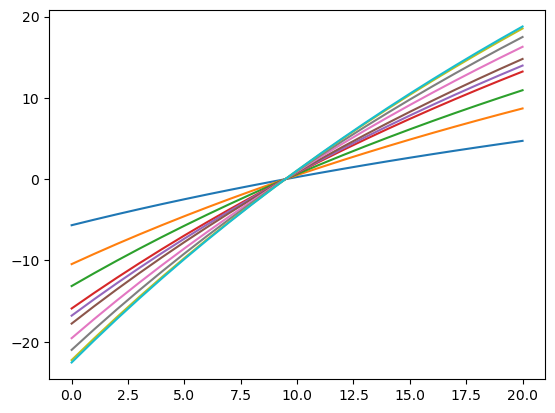

In [7]:
pdb = app.PDBFile("system.pdb")
forcefield = app.ForceField("amber14-all.xml", "amber14/tip3p.xml")
system = forcefield.createSystem(pdb.topology, nonbondedMethod=app.PME, nonbondedCutoff=1.1*unit.nanometer, constraints=app.HBonds)
system.addForce(mm.MonteCarloBarostat(1*unit.atmosphere, 300*unit.kelvin, 25))

group1, group2 = [], []
for res in pdb.topology.residues():
    for atom in res.atoms():
        if atom.index < 32:
            group1.append(atom.index)
        else:
            group2.append(atom.index)
create_nonbonded_energy_group(system, group1, group2)

# Define the temperature list
temp_list = np.arange(300, 401, 5)
int_gen = ITSLangevinIntegratorGenerator(temp_list, 2.0, 0.002, boost_e1_only=True)
log_nk_list = []

start_state = None
for nloop in range(10):
    simulation = app.Simulation(pdb.topology, system, int_gen.integrator)
    if start_state is None:
        simulation.context.setPositions(pdb.positions)
        simulation.context.setVelocitiesToTemperature(300*unit.kelvin)
    else:
        simulation.context.setPeriodicBoxVectors(*start_state.getPeriodicBoxVectors())
        simulation.context.setPositions(start_state.getPositions())
        simulation.context.setVelocities(start_state.getVelocities())
    simulation.minimizeEnergy()
    energy_list = []
    for nstep in trange(100):
        simulation.step(250)
        state = simulation.context.getState(getEnergy=True, groups={1})
        energy_list.append(state.getPotentialEnergy().value_in_unit(unit.kilojoule_per_mole))
    energy_list = np.array(energy_list)
    int_gen.update_nk(energy_list, ratio=0.5)
    log_nk_list.append(int_gen.log_nk)
    start_state = simulation.context.getState(getPositions=True, getVelocities=True)

    plt.plot(log_nk_list[-1])

## Boost torsion

Use log_nk [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


100%|██████████| 100/100 [00:08<00:00, 11.34it/s]


Use log_nk [-8.22960401 -7.35503397 -6.53558396 -5.76624431 -5.04259292 -4.36071155
 -3.71711609 -3.10869802 -2.53267521 -1.98655025 -1.46807496 -0.97522012
 -0.50614954 -0.05919767  0.36714973  0.77427231  1.16342972  1.53577434
  1.89236242  2.23416389  2.56207093  2.87690559  3.17942655  3.47033507
  3.7502803   4.01986403  4.27964491  4.53014224  4.77183936  5.00518669
  5.2306045 ]


100%|██████████| 100/100 [00:09<00:00, 11.04it/s]


Use log_nk [-14.32586612 -12.80776002 -11.38480029 -10.04834254  -8.79075872
  -7.60529199  -6.4859358   -5.42733263  -4.42468859  -3.47370126
  -2.57049832  -1.7115851   -0.89379969  -0.11427426   0.62959832
   1.34019345   2.01967996   2.67004207   3.29309864   3.89051999
   4.46384283   5.01448326   5.54374846   6.05284691   6.54289754
   7.0149379    7.4699314    7.90877383   8.33229918   8.74128492
   9.13645665]


100%|██████████| 100/100 [00:08<00:00, 11.25it/s]


Use log_nk [-19.76606073 -17.66874915 -15.70314875 -13.85729928 -12.12064638
 -10.48384076  -8.93857091  -7.47742289  -6.0937623   -4.78163438
  -3.53567909  -2.35105864  -1.22339536  -0.14871822   0.87658334
   1.8557994    2.7919344    3.6877375    4.54572909   5.36822419
   6.15735289   6.9150785    7.64321355   8.34343402   9.01729191
   9.66622656  10.29157466  10.89457922  11.47639769  12.03810913
  12.58072079]


100%|██████████| 100/100 [00:08<00:00, 11.36it/s]


Use log_nk [-24.41216349 -21.82355559 -19.39732434 -17.11871987 -14.97472776
 -12.95382108 -11.04575371  -9.24138724  -7.53254513  -5.91188933
  -4.37281547  -2.9093633   -1.51613998  -0.1882541    1.07874139
   2.28889853   3.44591733   4.55318326   5.61379997   6.63061815
   7.60626076   8.54314541   9.4435041   10.30940072  11.14274663
  11.94531456  12.71875091  13.46458689  14.18424845  14.87906514
  15.5502782 ]


100%|██████████| 100/100 [00:08<00:00, 11.33it/s]


Use log_nk [-29.89313535 -26.72663738 -23.75843474 -20.9705125  -18.34697505
 -15.87374331 -13.53830242 -11.32949032  -9.23731974  -7.25282755
  -5.36794677  -3.57539724  -1.86859198  -0.24155655   1.31114054
   2.79444817   4.21288503   5.57058545   6.87133937   8.11862751
   9.3156523   10.46536514  11.57049052  12.63354746  13.65686852
  14.64261672  15.5928007   16.50928827  17.39381849  18.24801266
  19.07338406]


100%|██████████| 100/100 [00:08<00:00, 11.29it/s]


Use log_nk [-33.29387296 -29.76359546 -26.45473209 -23.34717763 -20.42319127
 -17.66705881 -15.06481114 -12.60398839 -10.27344136  -8.06316341
  -5.96414769  -3.96826519  -2.06816026  -0.25716066   1.47080007
   3.12124989   4.69923681   6.20937991   7.65591401   9.04272889
  10.3734037   11.65123749  12.87927606  14.06033584  15.19702515
  16.29176305  17.34679624  18.36421418  19.34596258  20.29385561
  21.20958684]


100%|██████████| 100/100 [00:08<00:00, 11.24it/s]


Use log_nk [-37.04432303 -33.11713281 -29.43622769 -25.97923187 -22.72640176
 -19.66024987 -16.76523149 -14.02748207 -11.43459615  -8.97544024
  -6.63999382  -4.41921358  -2.30491707  -0.28968257   1.63323735
   3.46999081   5.22619172   6.90697666   8.51705461  10.06075057
  11.54204398  12.96460259  14.33181244  15.64680444  16.91247797
  18.13152195  19.30643363  20.43953536  21.5329897   22.58881293
  23.60888726]


100%|██████████| 100/100 [00:08<00:00, 11.20it/s]


Use log_nk [-40.4037995  -36.11823109 -32.1017549  -28.32991188 -24.78111899
 -21.43625854 -18.27833603 -15.29219337 -12.4642674   -9.78238548
  -7.23559181  -4.81399906  -2.50866126  -0.31146433   1.78496837
   3.78735802   5.70184153   7.53403367   9.28908152  10.97171213
  12.58627456  14.13677691  15.62691913  17.06012206  18.43955331
  19.76815027  21.04864064  22.28356087  23.47527259  24.62597749
  25.73773057]


100%|██████████| 100/100 [00:08<00:00, 11.14it/s]


Use log_nk [-45.64707302 -40.81260862 -36.28092119 -32.02448779 -28.01902275
 -24.24301535 -20.67734453 -17.30495605 -14.1105906  -11.08055378
  -8.20252049  -5.46536805  -2.85903303  -0.37438811   1.9968642
   4.26228386   6.42877333   8.5026476   10.48969534  12.39523257
  14.22414998  15.98095456  17.66980652  19.29455202  20.8587522
  22.36570913  23.81848889  25.21994232  26.57272355  27.87930664
  29.14200064]


100%|██████████| 100/100 [00:08<00:00, 11.38it/s]


Use log_nk [-47.97870158 -42.89549743 -38.1308514  -33.65580461 -29.44480424
 -25.47521713 -21.72692442 -18.18198186 -14.82433381 -11.63957119
  -8.61472567  -5.73809409  -2.99908784  -0.38810329   2.10359009
   4.48394678   6.76022949   8.9390828   11.02659753  13.02836722
  14.94953793  16.79485203  18.56868708  20.27509023  21.91780882
  23.50031765  25.02584331  26.49738594  27.9177388   29.28950576
  30.6151171 ]


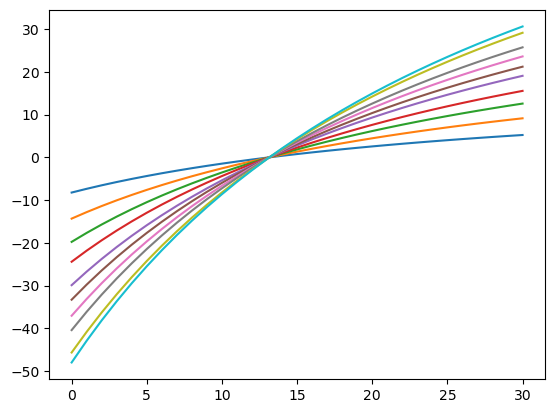

In [28]:
pdb = app.PDBFile("system.pdb")
forcefield = app.ForceField("amber14-all.xml", "amber14/tip3p.xml")
system = forcefield.createSystem(pdb.topology, nonbondedMethod=app.PME, nonbondedCutoff=1.1*unit.nanometer, constraints=app.HBonds)
system.addForce(mm.MonteCarloBarostat(1*unit.atmosphere, 300*unit.kelvin, 25))

rotamers = [
    [8, 14],
    [14, 16]
]
system = create_rotamer_torsion_energy_group(system, rotamers)
system = create_rotamer_14_energy_group(system, rotamers, pdb.topology)
group1, group2 = [], []
for res in pdb.topology.residues():
    for atom in res.atoms():
        if atom.index < 32:
            group1.append(atom.index)
        else:
            group2.append(atom.index)
system = create_nonbonded_energy_group(system, group1, group2)

# Define the temperature list
temp_list = np.arange(300, 601, 10)
int_gen = ITSLangevinIntegratorGenerator(temp_list, 2.0, 0.002, boost_e1_only=True)
log_nk_list = []

start_state = None
for nloop in range(10):
    simulation = app.Simulation(pdb.topology, system, int_gen.integrator)
    if start_state is None:
        simulation.context.setPositions(pdb.positions)
        simulation.context.setVelocitiesToTemperature(300*unit.kelvin)
    else:
        simulation.context.setPeriodicBoxVectors(*start_state.getPeriodicBoxVectors())
        simulation.context.setPositions(start_state.getPositions())
        simulation.context.setVelocities(start_state.getVelocities())
    simulation.minimizeEnergy()
    energy_list = []
    for nstep in trange(100):
        simulation.step(250)
        state = simulation.context.getState(getEnergy=True, groups={1})
        energy_list.append(state.getPotentialEnergy().value_in_unit(unit.kilojoule_per_mole))
    energy_list = np.array(energy_list)
    int_gen.update_nk(energy_list, ratio=0.5)
    log_nk_list.append(int_gen.log_nk)
    start_state = simulation.context.getState(getPositions=True, getVelocities=True)

    plt.plot(log_nk_list[-1])

In [30]:
int_gen.log_nk

array([-47.97870158, -42.89549743, -38.1308514 , -33.65580461,
       -29.44480424, -25.47521713, -21.72692442, -18.18198186,
       -14.82433381, -11.63957119,  -8.61472567,  -5.73809409,
        -2.99908784,  -0.38810329,   2.10359009,   4.48394678,
         6.76022949,   8.9390828 ,  11.02659753,  13.02836722,
        14.94953793,  16.79485203,  18.56868708,  20.27509023,
        21.91780882,  23.50031765,  25.02584331,  26.49738594,
        27.9177388 ,  29.28950576,  30.6151171 ])

In [31]:
temp_list = np.arange(300, 601, 10)
log_nk = np.array([13.76272293, 12.31904684, 10.96359052,  9.68848827,  8.48678648,
        7.35231432,  6.27957602,  5.26366059,  4.30016568,  3.3851332 ,
        2.51499443,  1.68652314,  0.89679541,  0.14315489, -0.57681713,
       -1.2653278 , -1.92439532, -2.55586886, -3.1614458 , -3.7426871 ,
       -4.30103068, -4.83780336, -5.35423136, -5.85144971, -6.3305105 ,
       -6.79239041, -7.23799728, -7.6681761 , -8.08371437, -8.48534688,
       -8.87376006])

In [44]:
e_ref, e_boost = [], []
with open("boost_dih.out", "r") as f:
    text = f.readlines()[1:]
for line in text:
    e_boost.append(float(line.split(",")[1]))
with open("ref_dih.out", "r") as f:
    text = f.readlines()[1:]
for line in text:
    e_ref.append(float(line.split(",")[1]))
e_ref = np.array(e_ref)
e_boost = np.array(e_boost)

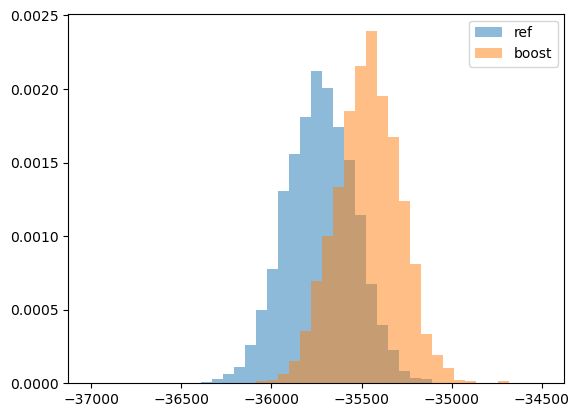

In [45]:
plt.hist(e_ref, label="ref", range=(-37000, -34500), bins=41, alpha=0.5, density=True)
plt.hist(e_boost, label="boost", range=(-37000, -34500), bins=41, alpha=0.5, density=True)
plt.legend()

In [46]:
import mdtraj as md

(-3.141592653589793, 3.141592653589793)

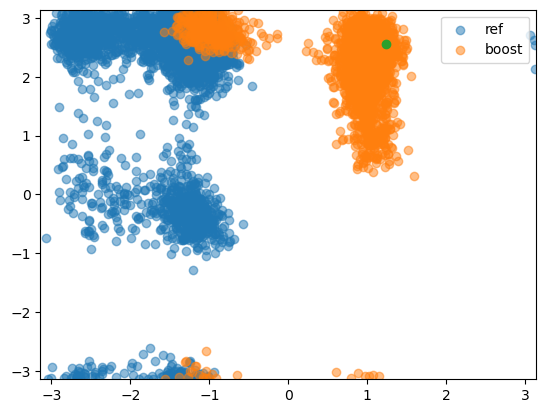

In [48]:
# compute dihedral-dihedral distribution
dih_list = [
    [4, 6, 8, 14],
    [6, 8, 14, 16]
]

traj = md.load("ref_dih.dcd", top="system.pdb")[20:]
dih_ref = md.compute_dihedrals(traj, dih_list)
traj = md.load("boost_dih.dcd", top="system.pdb")[20:]
dih_boost = md.compute_dihedrals(traj, dih_list)
plt.scatter(dih_ref[:, 0], dih_ref[:, 1], label="ref", alpha=0.5)
plt.scatter(dih_boost[:, 0], dih_boost[:, 1], label="boost", alpha=0.5)
plt.scatter(dih_boost[-1,0], dih_boost[-1,1])
plt.legend()
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
